# A "Simple Program"


In [ ]:
#!pip install pandas_datareader # uncomment and run this to install pandas data reader

In [31]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['GME','AMC','BB']
start_yr = datetime(2021, 1, 1)

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,GME,AMC,BB
Date,,,
2021-01-04,17.250000,2.01,6.580000
2021-01-05,17.370001,1.98,6.770000
2021-01-06,18.360001,2.01,6.710000
2021-01-07,18.080000,2.05,7.060000
2021-01-08,17.690001,2.14,7.560000
2021-01-11,19.940001,2.20,7.650000
2021-01-12,19.950001,2.29,7.630000
2021-01-13,31.400000,2.18,7.440000
2021-01-14,39.910000,2.18,9.110000


In [32]:
# this is wide data... so if we want to create a new variable, we have to do it once for each firm...
# what if we have 1000 firms? seems tough to do...
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['Firm','Date','Adj Close']
stock_prices # print - now that is formatted nicely, like CRSP! 


,Firm,Date,Adj Close
0,AMC,2021-01-04,2.010000
1,AMC,2021-01-05,1.980000
2,AMC,2021-01-06,2.010000
3,AMC,2021-01-07,2.050000
4,AMC,2021-01-08,2.140000
...,...,...,...
58,GME,2021-01-27,347.510010
59,GME,2021-01-28,193.600006
60,GME,2021-01-29,325.000000
61,GME,2021-02-01,225.000000


In [33]:
# add return var.
# MAKE SURE YOU CREATE THE VARIABLES WITHIN EACH FIRM - use groupby
stock_prices['ret'] = stock_prices.groupby('Firm')['Adj Close'].pct_change()
stock_prices # print - the first ret for each firm should be missing...

,Firm,Date,Adj Close,ret
0,AMC,2021-01-04,2.010000,NaN
1,AMC,2021-01-05,1.980000,-0.014925
2,AMC,2021-01-06,2.010000,0.015152
3,AMC,2021-01-07,2.050000,0.019900
4,AMC,2021-01-08,2.140000,0.043903
...,...,...,...,...
58,GME,2021-01-27,347.510010,1.348358
59,GME,2021-01-28,193.600006,-0.442894
60,GME,2021-01-29,325.000000,0.678719
61,GME,2021-02-01,225.000000,-0.307692


<AxesSubplot:xlabel='Date'>

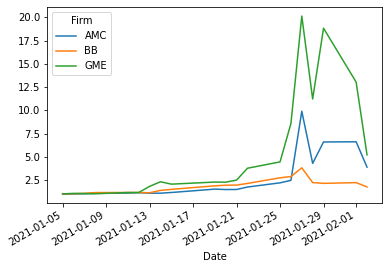

In [34]:
(stock_prices
     .assign(ret=1+stock_prices.ret)              # gross returns
     .set_index(['Date','Firm'])['ret'].unstack() # convert to wide format
     .cumprod()
     .plot()
)